# <span style="color:red"> Solutions 3</span>

## FINM 37400 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# 1 HBS Case: Fixed-Income Arbitrage in a Financial Crisis (C): Spread and Swap Spread in November 2008

## Simplification of the setup

The date is Nov 4, 2008.

**Treasury bond**
* Suppose the Treasury bond matures exactly 30 years later, on Nov 4, 2038 rather than May 15, 2008. 
* The YTM of this freshly issued treasury is 4.193\% with a semiannual coupon of 4.50\%, same as is given in the case. (So we're just changing the maturity date to simplify things, but keeping the market data.)

**Swap**
* The fixed leg of the swap pays semiannually, with swap rate of 4.2560\%, as given in the case.
* The floating leg of the swap also pays semiannually--not quarterly--such that the payment dates are identical on both legs. Thus, it also resets the floating rate semiannually, not quarterly.
* The floating rate of the swap equals the repo rate used in the trade. Thus, these two rates cancel in the financing of the trade. (No need to consider the TED spread.) 

## Case Clarifications


### Duration Quotes
Bond
* Quote: Val01 of bond is .1746 per bp per \\$1 face value
* Class terminology: Modified dollar duration is .1746 per \\$100 face value

Swap
* Quote: DV01 of swap is 1.7mm per 1 billion notional.
* Class terminology: Modified dollar duration is 100(1.7/1000) per \\$100 face value.

Thus, modified dollar duration for each per 100 face is
* Bond = .1746
* Swap = .1700

### Hedge Ratio

In figuring out the hedge ratio, they set up the hedge per dollar of face value. 

    *so Mills would need to buy face amount \\$0.97 billion*
    
No, this hedge should be for market value, not face amount given that the case is already using **modified** duration which includes the dirty price.
    

### Maturity Mismatch

The maturity of the bond is August 2038, whereas the date is Nov 2008. Thus, the bond has less than 30 years to maturity, yet he is entering a 30-year swap. 

For simplicity, we imagine the bond is issued in Nov 2008 and thus has maturity of 30 years at the time of the case.

However, then the case quotes for the Nov price and YTM of the bond no longer are accurate. Use one and adjust the other. Namely, we could...
* use the Nov 4 **YTM** quoted in the case, and adjust the bond **price**.
* use the Nov 4 **price** quoted in the case, and adjust the **YTM**.
    
We do the former, keep the quoted YTM, assume time-to-maturity of `30`, and recalculate the Nov 2008 price. (It is close to the quoted price in the case.)

***

## 1.0.

Report the price of the 30-year T-bond in Nov 2008. Given the discussion about `Maturity Mismatch`, we are repricing the bond, so it will not exactly equal `105` as reported in the case.

## 1.1

List the projected cashflows on May 4, 2009, exactly six months into the trade, on the first coupon and swap date.

#### Clarification
List these cashflows for face value of $1B, not the $0.97B noted in the case. As mentioned in "Case Clarifications", we will not use this number. Rather, we calculate our own hedge ratio in a problem below.

## 1.2

What is the duration of...
* the T-bond
* the swap

Remember that...
* the swap can be decomposed into a fixed-rate bond and a floating-rate note
* a floating-rate note has duration equal to the time until the next reset. Thus, at initialization, it has duration equal to 0.5 years.

Is the duration for the "paying-fixed" swap positive or negative? Is it bigger or smaller in magnitude than the T-bond?

For this problem, calculate the Macauley duration and the dollar (Macauley) duration.

## 1.3

What hedge ratio should be used to balance the notional size of the Treasury bond with the notional size of the swap, such that it is a duration-neutral position?

Specifically, if the trader enters the swap paying fixed on \$500 million notional, how large of a position should they take in the Treasury bond?

## 1.4

Suppose it is May 4, 2009, exactly six months after putting the trade on.

The spread is at -28 bps due to...
* The YTM on a new 30-year bond has risen to 4.36\%
* The swap rate on a new 30-year swap has dropped to 4.08\%

Explain conceptually how this movement impacts the components of the trade.

## 1.5

Calculate the value of the position on May 4, 2009, immediately after the first coupon and swap payments and swap reset. 

* Calculate the revised price of the Treasury bond by assuming you can apply the (May 4) 30-year YTM as a discount rate to the 29.5 year bond. (We are just using this for a rough approximation. You know that good pricing would require a discount curve, but let's not get bogged down with that here.)


* Calculate the value of the swap by decomposing it into a fixed-rate bond and a floating-rate bond.
    * The 29.5 year fixed-rate leg is priced using the (May 4) 30-year swap rate as a discount rate.
    * The floating-rate leg is priced at par given that floating-rate notes are par immediately after resets.
    
**Note**

You are being asked to calculate these valuations using the exact formula between price, cashflows, and YTM discount rate. We are not simply approximating with duration, as we already know the position was set up with zero dollar duration.

From the Discussion 1 notebook, we have this formula expressing a bond's price as a function of the coupon, $c$, and the YTM, $y_j$.

$\begin{align*}
P_j(t,T,c) = \sum_{i=1}^{n-1}\frac{100\left(\frac{c}{2}\right)}{\left(1+\frac{y_j}{2}\right)^{2(T_i-t)}} + \frac{100\left(1+\frac{c}{2}\right)}{\left(1+\frac{y_j}{2}\right)^{2(T-t)}}
\end{align*}
$

## 1.6

Accounting for the change in value of the positions, as well as the 6-month cashflows paid on May 4, 
* what is the net profit and loss (pnl) of the position?
* what is the return on the equity capital, considering that there was a 2\% haircut (equity contribution) on the size of the initial treasury bond position.

***

# <span style="color:red">Solution 1</span>

See separate notebook discussing the case.

***

# 2. Factor Duration

### Data

This problem uses data from,
* `/data/yields.xlsx`
* `/data/treasury_ts_duration_2024-10-31.xlsx`

#### Load Yields

In [1]:
import pandas as pd
import numpy as np

In [2]:
filepath = '../data/yields.xlsx'
yields = pd.read_excel(filepath, sheet_name='yields')
yields.set_index('caldt',inplace=True)

#### Load Prices and Durations of Two Treasuries

In [3]:
QUOTE_DATE = '2024-10-31'
filepath = f'../data/treasury_ts_duration_{QUOTE_DATE}.xlsx'

data = pd.read_excel(filepath,sheet_name='database')
data_info =  data.drop_duplicates(subset='KYTREASNO', keep='first').set_index('KYTREASNO')
data_info[['type','issue date','maturity date','cpn rate']]

,type,issue date,maturity date,cpn rate
KYTREASNO,,,,
207391,note,2019-08-15,2029-08-15,1.625
207392,bond,2019-08-15,2049-08-15,2.250


You will largely focus on the sheets which give the timeseries of prices and durations for each of the two securities, as shown in the following code.

In [4]:
SHEET_PRICE = 'price'
SHEET_DURATION = 'duration'
INDEX_NAME = 'quote date'

price = pd.read_excel(filepath,sheet_name=SHEET_PRICE).set_index(INDEX_NAME)
duration = pd.read_excel(filepath,sheet_name=SHEET_DURATION).set_index(INDEX_NAME)

### 2.1.

Construct the following yield-curve factors from the `yields` data set:

$\begin{align}
x^{\text{level}}_t =& \frac{1}{N_{\text{yields}}}\sum_{i=1}^{N_{\text{yields}}} y^{(i)}_t\\
x^{\text{slope}}_t =& y^{(30)}_t - y^{(1)}_t\\
x^{\text{curvature}}_t =& -y^{(1)}_t + 2 y^{(10)}_t - y^{(30)}_t
\end{align}$

### 2.2

Get the bond prices and durations for the two bonds in the data set referenced above.

#### Align the data

Align the bond pricing data with the yield factor data, so that you have data for both in the intersection of their dates.


#### Estimate the regression

Estimate the regression in the form of day-over-day differences for both bond prices and factors. That is, we are using regression to approximate the factor duration equation,

$\begin{align}
\frac{dP}{P} = \alpha + \beta_L dx_{\text{level}} + \beta_S dx_{\text{slope}} + \beta_C dx_{\text{curvature}} + \epsilon
\end{align}$

Report the betas for each of these factors, for each of the bond prices.

### 2.3.

Compare the "level" factor beta for each of the two treasuries with the average  duration for each bond as reported in the data set.

* How closely does the average duration for a bond compare to its "level" beta?
* What do you conclude about the usefulness of mathematical duration vs regression sensitivities?

### 2.4.

In the duration-hedged trade of `Homework 2, Section 2`, was the that trade was long or short this slope factor? 

Do you think the slope factor exposure had a large impact on the trade?

No new analysis needed, just draw a conclusion from the estimates above along with the trade construction in `HW 2, Sec 2`.

***

# <span style="color:red">Solution 2</span>

In [5]:
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

### <span style="color:red">2.1</span>

In [6]:
shapes = pd.DataFrame(yields.mean(axis=1),columns=['level'])
shapes['slope'] = yields[30]-yields[1]
shapes['curvature'] = -yields[1] + 2 * yields[10] - yields[30]

### <span style="color:red">2.2</span>

#### Note: Intercept
It makes little difference whether an intercept is included in this regression, and either is defensible. If we standardize the factors, as done at the end, it will make no difference.

In [7]:
from sklearn.linear_model import LinearRegression

dp_pct = price.pct_change().dropna()
dfac = shapes.diff().dropna()
dp_pct, dfac = dp_pct.align(dfac,join='inner',axis=0)

factor_durations = pd.DataFrame(-LinearRegression(fit_intercept=True).fit(dfac,dp_pct).coef_.T, columns = dp_pct.columns, index= dfac.columns)
factor_durations

,207391,207392
level,0.069938,0.197983
slope,0.004759,0.126491
curvature,0.010926,-0.074870


### <span style="color:red">2.3.</span>

#### Comparison to Duration

Compare to average duration.

In [8]:
duration.mean()

207391     6.923664
207392    19.903216
dtype: float64

The regression approach gets the right sensitivity on average (across the timeseries). But this unconditional estimate would be a poor guide to the duration at any particular day.

Note that the quantiles of the duration over this period range substantially from the average, which is what is estimated in the regression.

In [9]:
duration.describe()

,207391,207392
count,1330.000000,1330.000000
mean,6.923664,19.903216
std,1.377343,1.741904
min,4.521627,17.202706
25%,5.715287,18.171306
50%,6.942685,20.230206
75%,8.123490,21.559846
max,9.289497,22.816390


### <span style="color:red">Extra:</span>

The way we constructed level, slope, curvature, they may each have very different scalings (magnitudes,) which makes their betas hard to interpret. Easier to normalize them with a z-score, so that the resulting betas can be interpreted as the reaction to a one-sigma move in the factor.

In [10]:
def zscore(df):
    z = df.sub(df.mean(axis=0)).div(df.std(axis=0))
    return z

dz = zscore(dfac)

z_durations = pd.DataFrame(-LinearRegression(fit_intercept=True).fit(dz,dp_pct).coef_.T, columns = dp_pct.columns, index= dz.columns)
z_durations

,207391,207392
level,0.003761,0.010647
slope,0.000282,0.007504
curvature,0.000660,-0.004526


***

# 3 Calculating Duration Via Individual Cashflows

## *Optional, not submitted*

Use the data file `../data/treasury_quotes_2024-10-31.xlsx`.

### 3.1 
Set up the cashflow matrix. 

### 3.2
Extract the Nelson-Siegel spot discount curve, as you did in `Homework 1`.

### 3.3
For each treasury issue, calculate the duration as the weighted average of the (discounted!) cashflow maturity.

Report the summary statistics of the durations. (Use `.describe()` from pandas.)

### 3.4
How close are your duration estimates to the imputed durations given in the data source?

Report the summary statistics of the imputed durations minus your calculated durations from above.

### 3.5
Continue using your extracted discount rates to calculate the convexity of each issue.

Report the summary statistics of these convexity calculations.

***

# <span style="color:red">Solution 3</span>

In [11]:
from fixedinc import *

### <span style="color:red">3.1.</span>

In [12]:
QUOTE_DATE = '2024-10-31'
filepath_rawdata = f'../data/treasury_quotes_crsp_{QUOTE_DATE}.xlsx'
rawdata = pd.read_excel(filepath_rawdata,sheet_name='quotes')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)
rawdata.set_index('KYTREASNO',inplace=True)

filepath_rawdata = f'../data/treasury_quotes_{QUOTE_DATE}.xlsx'
quotes = pd.read_excel(filepath_rawdata,sheet_name='quotes').set_index('KYTREASNO')
t_current = quotes['quote date'].values[0]

In [13]:
RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = False
RESTRICT_REDUNDANT = False

data = filter_treasuries(quotes, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)

CF = filter_treasury_cashflows(calc_cashflows(data),filter_maturity_dates=RESTRICT_DTS_MATURING)
prices = quotes['dirty price'].loc[CF.index]

AVG_LEVEL = .045
AVG_SLOPE = -.005
FIRST_HUMP = .01
FIRST_DECAY = 2
SECOND_HUMP = -.01
SECOND_DECAY = 2

x0 = np.array([AVG_LEVEL, AVG_SLOPE, FIRST_HUMP, FIRST_DECAY])
params_NS = estimate_rate_curve(nelson_siegel,CF,t_current,prices,x0)

x0 = np.concatenate((params_NS,(SECOND_HUMP, SECOND_DECAY)))
params_NSE = estimate_rate_curve(nelson_siegel_extended,CF,t_current,prices,x0=x0)

tab_params_ns = pd.DataFrame(data = params_NS, index=['theta 0', 'theta 1', 'theta 2', 'lambda_1'],columns=['Nelson-Siegel']).T
tab_params_ns.loc[:,['theta_3', 'lambda_2']] = None
tab_params_ns.loc['Nelson-Siegel Extended',:] = params_NSE
tab_params_ns

,theta 0,theta 1,theta 2,lambda_1,theta_3,lambda_2
Nelson-Siegel,0.047890,-0.002237,-0.020374,2.126948,None,None
Nelson-Siegel Extended,0.047856,-0.003927,-0.909713,1.613092,0.892451,1.598478


In [14]:
maturity_series = pd.Series(get_maturity_delta(CF.columns.values,t_current=t_current),index=CF.columns)
maturity_grid = maturity_series.values
curves = pd.DataFrame(index = CF.columns, dtype=float)
curves['discount rate'] = compound_rate(nelson_siegel(tab_params_ns.loc['Nelson-Siegel',:],maturity_grid),None,2)
curves['discount factor'] = intrate_to_discount(curves['discount rate'],maturity_grid,2)

/Users/markhendricks/Projects/finm-fixedincome-2025/dev/../cmds/treasury_cmds.py:255: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rate = params[0] + (params[1] + params[2]) * (1 - np.exp(-maturity/params[3]))/(maturity/params[3]) - params[2] * np.exp(-maturity/params[3])


### <span style="color:red">3.2.</span>

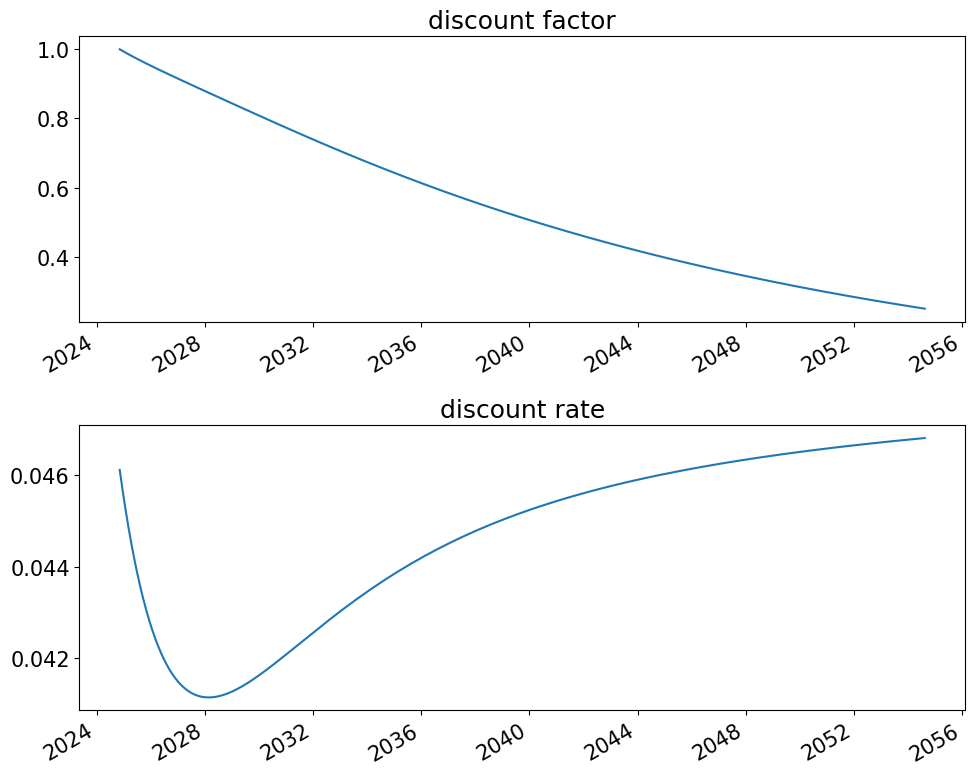

In [15]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
curves['discount factor'].plot(ax=ax[0],title='discount factor');
curves['discount rate'].plot(ax=ax[1],title = 'discount rate');
plt.tight_layout()

### <span style="color:red">3.3.</span>

In [16]:
wts = CF.mul(curves['discount factor'],axis=1)
wts = wts.div(wts.sum(axis=1),axis=0)
duration = (wts @ maturity_series.to_frame()).rename(columns={0:'duration'})

### <span style="color:red">3.4.</span>

In [17]:
FREQ = 365.25
duration['errors'] = (rawdata['TDDURATN']/FREQ  - duration['duration']).abs()

### <span style="color:red">3.5.</span>

In [18]:
duration['convexity'] = wts @ maturity_grid**2

### <span style="color:red">Display Answers</span>

In [19]:
duration.describe()

,duration,errors,convexity
count,395.000000,395.000000,395.000000
mean,4.945647,0.017318,65.508051
std,5.350579,0.047710,115.053633
min,0.013689,0.000000,0.000187
25%,0.910377,0.000003,0.830817
50%,2.765600,0.000090,7.938260
75%,6.308805,0.002006,42.099827
max,19.624963,0.305838,460.697982
